<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220304_matching(ORB%2BBFMatcher%2BknnMatch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 특징점 검출기
 > GFTT, FAST
# 특징 디스크립터 검출기
 > SIFT, SURF, ORB

# GFTT(Good Feature to Track)

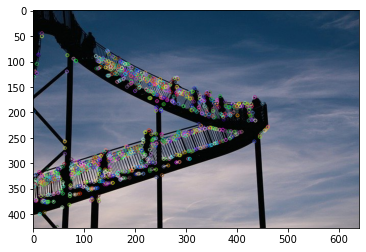

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Good Feature to Track Detector (GFTTD) 검출기 생성
gftt = cv2.GFTTDetector_create()
# 특징점 검출
keypoints = gftt.detect(img_gray, None) # len(keypoints) : 1000, list type
# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

# 결과 출력
plt.imshow(img_draw[:,:,::-1])

# Fast

791

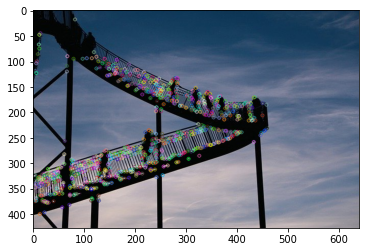

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Fast 특징 검출기
fast = cv2.FastFeatureDetector_create(50) # threshold(코너판단 임계값) default : 10
# 특징점 검출
keypoints = fast.detect(img_gray, None)
# 특징점 그리기
img_draw = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(img_draw[:,:,::-1])
len(keypoints)


### Fast(threshold 변화에 따른 keypoints 변화)

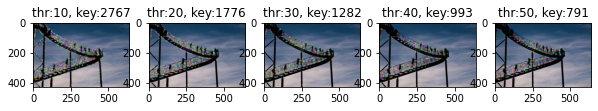

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

test_val = list(range(10, 60, 10))
plt.figure(figsize=(10, 5))
for idx, val in enumerate(test_val):
  # Fast 특징 검출기
  fast = cv2.FastFeatureDetector_create(val) # threshold(코너판단 임계값) default : 10
  # 특징점 검출
  keypoints = fast.detect(img_gray, None)
  # 특징점 그리기
  img_draw = cv2.drawKeypoints(img, keypoints, None)
  
  plt.subplot(1, len(test_val), idx+1)
  plt.title("thr:{}, key:{}".format(val, len(keypoints)))
  plt.imshow(img_draw[:,:,::-1])


  

In [ ]:
cv2.__version__

'4.1.2'

# SURF(Speeded Up Robust Features) : cv2 3.4.2 이상에서 작동X
> SIFT의 속도를 개선한 알고리즘

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # SURF 추출기 생성(특징추출경계threshold:1000, 이미지 피라미드 계층수:3, 디스크립터 생성 플래그, 방향계산 플래그)
# surf = cv2.xfeatures2d.SURF_create(1000, 3, True, True)
# # 키포인트 검출 및 디스크립터 계산
# keypoints, desc = surf.detecAndCompute(img_gray, None)
# print(desc.shape, desc)

# ORB(Oriented and Rotated BRIEF)
> BRIEF 알고리즘에 방향과 회전을 추가한 알고리즘

(500, 32) [[126 178 176 ... 100 143  87]
 [ 97 119 121 ... 146  66 161]
 [ 82  32 158 ...  96 163   2]
 ...
 [  1 156  39 ... 129  81  61]
 [187 195 106 ... 140 248 205]
 [ 47 161  40 ...  15 218 134]]


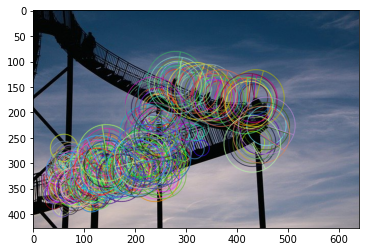

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SURF 추출기 생성(특징추출경계threshold:1000, 이미지 피라미드 계층수:3, 디스크립터 생성 플래그, 방향계산 플래그)
orb = cv2.ORB_create()
# 키포인트 검출 및 디스크립터 계산
keypoints, desc = orb.detectAndCompute(img_gray, None)
print(desc.shape, desc) # 500개의 특징점 검출, shape : (500, 32)

img_draw = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS : 동그라미 크기를 size,angle 반영
plt.imshow(img_draw[:,:,::-1])

### cv2.drawKeypoints()의 파라미터 중 flags

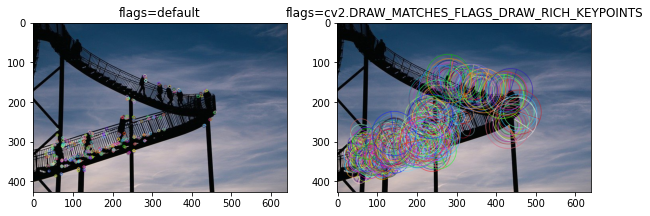

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성(특징추출경계threshold:1000, 이미지 피라미드 계층수:3, 디스크립터 생성 플래그, 방향계산 플래그)
orb = cv2.ORB_create()
# 키포인트 검출 및 디스크립터 계산
keypoints, desc = orb.detectAndCompute(img_gray, None)
# print(desc.shape, desc) # 500개의 특징점 검출, shape : (500, 32)

img_draw1 = cv2.drawKeypoints(img, keypoints, None)
img_draw2 = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS : 동그라미 크기를 size,angle 반영

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img_draw1[:,:,::-1])
plt.title("flags=default")
plt.subplot(1,2,2)
plt.title("flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS")
plt.imshow(img_draw2[:,:,::-1])


# 특징 매칭(Feature Matching)
> BFMatcher, FLANN

### BFMatcher(Brute-Force Matcher) with ORB
 - 모든 디스크립터 전수조사 하므로 이미지 사이즈가 클수록 속도가 느림

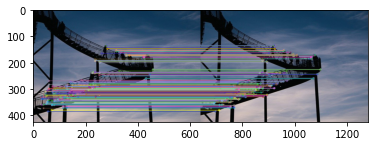

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키포인트, 디스크립터 추출
kp1, desc1 = orb.detectAndCompute(img_gray1, None)
kp2, desc2 = orb.detectAndCompute(img_gray2, None)

# BFMatcher 생성
# matcher = cv2.DescriptorMatcher_create("BruteForce-Hamming")
# DescriptorMatcher_create(matcherType)해도 되고, 특징매칭 클래스 BFMatcher(), FlannBasedMater() 해도됨
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # 파라미터 : 알고리즘선정, 상호매칭되는것만 반영여부
# 매칭 계산
matches = matcher.match(desc1, desc2) # 매칭함수 3가지 : match(), knnMatch(), radiusMatch()
# 매칭 결과 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# flags: 매칭점 그리기 옵션
# cv2.DRAW_MATCHES_FLAGS_DEFAULT: 결과 이미지 새로 생성(default값)
# cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG: 결과 이미지 새로 생성 안 함
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS: 특징점 크기와 방향도 그리기
# cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS: 한쪽만 있는 매칭 결과 그리기 제외

plt.imshow(res[:,:,::-1])


### FLANN(Fast Library for Approximate Nearest Neighbors Matching) with ORB
 - 모든 디스크립터 전수조사X, 이웃하는 디스크립터끼리 비교

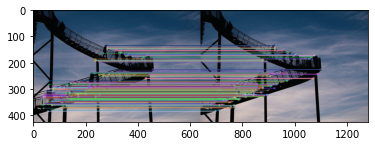

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/matching.jpg')

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키포인트, 디스크립터 추출
kp1, desc1 = orb.detectAndCompute(img_gray1, None)
kp2, desc2 = orb.detectAndCompute(img_gray2, None)

# 인덱스 파라미터와 검색 파라미터 설정(추천값)
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params=dict(checks=32)

# Flann matcher 생성
matcher = cv2.FlannBasedMatcher(index_params, search_params)
# 매칭 계산
matches = matcher.match(desc1, desc2)
# 매칭 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(res[:,:,::-1])

True

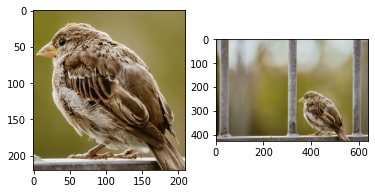

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bird.jpg')
crop = img[200:420, 340:550]

plt.subplot(1, 2, 1)
plt.imshow(crop[:,:,::-1])
plt.subplot(1, 2, 2)
plt.imshow(img[:,:,::-1])

cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/bird1.jpg', crop)

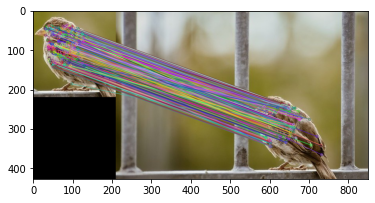

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bird1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bird.jpg')

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키포인트, 디스크립터 추출
kp1, desc1 = orb.detectAndCompute(img_gray1, None)
kp2, desc2 = orb.detectAndCompute(img_gray2, None)

# 인덱스 파라미터와 검색 파라미터 설정(추천값)
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6,
                   key_size = 12,
                   multi_probe_level = 1)
search_params=dict(checks=32)

# Flann matcher 생성
matcher = cv2.FlannBasedMatcher(index_params, search_params)
# 매칭 계산
matches = matcher.match(desc1, desc2)
# 매칭 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(res[:,:,::-1])

# 매칭 함수 3가지 : match(), knnMatch(), radiusMatch()

### match()의 반환값인 distance 설정으로 올바른 매칭 찾기

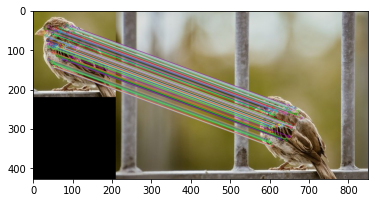

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bird1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bird.jpg')

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키포인트, 디스크립터 추출
kp1, desc1 = orb.detectAndCompute(img_gray1, None)
kp2, desc2 = orb.detectAndCompute(img_gray2, None)
# BFMatcher(특징매칭 클래스)의 cv2.NORM_HAMMING(알고리즘) 이용
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# match(), knnMatch(), radiusMatch()함수의 반환결과는 Dmatch 객체가 담긴 리스트
# Dmatch[i].distance : 유사도 거리(매칭점의 유사도 거리가 짧은경우 올바른 매칭점일 가능성이 크다)
# 매칭 결과를 거리기준 오름차순 정렬(매칭결과들에 대해 .distance 값 기준으로 정렬)
matches = sorted(matches, key=lambda x: x.distance)
# 최소 거리 값과 최대 거리 값 확보
min_dist, max_dist = matches[0].distance, matches[-1].distance
# 최소 거리의 20% 지점을 임계점으로 설정
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist # 최소거리 + 0.2(최대거리-최소거리)
# 임계점보다 작은 매칭점만 좋은 매칭점으로 분류
good_matches = [m for m in matches if m.distance < good_thresh] # list 컴프리헨션(리스트 내부에서 조건으로 필터링할때 활용)

# 좋은 매칭점만 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(res[:,:,::-1])

In [ ]:
matches[0].distance # 0.0
dir(matches[0]) # matches의 각 객체인 Dmatch의 attribute list : [..., 'distance', 'imgIdx', 'queryIdx', 'trainIdx']

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'distance',
 'imgIdx',
 'queryIdx',
 'trainIdx']

### knnMatch()의 반환값인 distance 설정으로 올바른 매칭 찾기

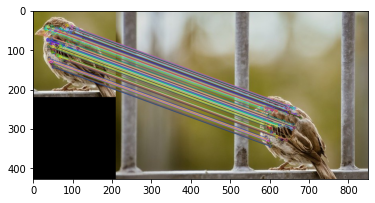

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bird1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/bird.jpg')

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 추출기 생성
orb = cv2.ORB_create()
# 키포인트, 디스크립터 추출
kp1, desc1 = orb.detectAndCompute(img_gray1, None)
kp2, desc2 = orb.detectAndCompute(img_gray2, None)
# BFMatcher(특징매칭 클래스)의 cv2.NORM_HAMMING2(알고리즘) 이용
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
# knnMatch(), k=2
matches = matcher.knnMatch(desc1, desc2, 2)

# match(), knnMatch(), radiusMatch()함수의 반환결과는 Dmatch 객체가 담긴 리스트
# 첫번째 이웃의 거리가 두번째 이웃 거리의 75% 이내인 것만 추출
ratio = 0.75
good_thresh = [first for first, second in matches if first.distance < second.distance * ratio]

# 좋은 매칭점만 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(res[:,:,::-1])

# 매칭 영역 원근 변환
> - ORB 디스크립터 생성자
> - BFmatcher 특징 매칭 클래스
> - cv2.NORM_HAMMING2 매칭 알고리즘
> - knnMatch() 매칭 함수 사용 

총 matches : 500
총 goodmatches : 26


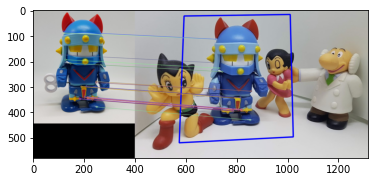

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/taekwonv1.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/figures.jpg')

img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB 추출기(디스크립터) 생성
orb = cv2.ORB_create()
kp1, desc1 = orb.detectAndCompute(img_gray1, None)
kp2, desc2 = orb.detectAndCompute(img_gray2, None)
# BFMatcher(특징매칭 클래스)의 cv2.NORM_HAMMING2(알고리즘) 이용
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
# knnMatch(k=2)
matches = matcher.knnMatch(desc1, desc2, 2)
print("총 matches :", len(matches))
# 이웃거리의 75%로 좋은 매칭점 추출
ratio = 0.75
good_matches = [first for first,second in matches if first.distance < second.distance * ratio]
print("총 goodmatches :", len(good_matches))

# 좋은 매칭점의 queryIdx로 원본영상의 좌표 구하기
# for m in good_matches:
#   print(m.queryIdx) # 원본이미지에서 좋은 매칭점의 인덱스번호
#   print(kp1[m.queryIdx]) # 원본이미지에서 좋은 매칭점(KeyPoint) : pt, size, angle 등의attribute정보를 담는 객체
#   print(kp1[m.queryIdx].pt) # (147.0, 208.0) 매칭점의 좌표(x, y) float타입이며, 정수변환 필요
# print([kp1[m.queryIdx].pt for m in good_matches]) # [(x, y), (x, y), ...] : list
# print(np.float32([kp1[m.queryIdx].pt for m in good_matches])) # [[x, y] [x, y] [x, y] ...] : 배열 (26, 2)
# print(np.array([kp1[m.queryIdx].pt for m in good_matches], dtype=np.float32)) # np.float32(), np.array(dtype=np.float32) 두가지방법이 있음

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]) # (26, 2)
# 좋은 매칭점의 trainIdx로 대상 영상의 좌표 구하기
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]) # (26, 2)

# 원근 변환 행렬 구하기(좋은 매칭점들로 부터 근사계산한), 변환 행렬의 shape (3, 3)
mtrx, mask = cv2.findHomography(src_pts, dst_pts) # mask : 정상치 판별 결과(0:비정상치, 1:정상치)
# 원본 이미지 크기로 변환 영역 좌표 생성
h, w = img1.shape[:2]
# 3차원 좌표를 만드는 방법 2가지
## 1. 대괄호를 추가로 감싸는 방법(2차원 좌표 각각에 대괄호 추가)
pts = np.array([ [[0,0]],[[0,h]],[[w,h]],[[w,0]] ], dtype=np.float32) # 반시계방향(왜??)으로 4지점 좌표, (4, 1, 2)
## 2. 2차원 좌표를 reshape(N, 1, 2)하는 방법
pts = np.array([ [0,0],[0,h],[w,h],[w,0] ], dtype=np.float32).reshape(-1, 1, 2) # (4, 1, 2)

# pts는 3차원 배열(N, 1, 2) 되어야 함 주의!!!
# 원본 영상 좌표를 원근 변환
dst = cv2.perspectiveTransform(pts, mtrx) # (4, 1, 2)
# mtrx가 적용된 변환 좌표 영역을 대상 이미지에 그리기
img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA) # [dst] 이유 : 파라미터로 그릴 좌표'들'을 리스트로 받으므로, [dst1, dst2, ...] 일 수 있으니까
# cv2.polylines()의 파라미터로 int32 자료형이 요구됨

# 좋은 매칭 그려서 출력
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(res[:,:,::-1])


# 아래코드는 참고
> - matrix = getPerspectiveTransforam(src, dst)
> - result = warpPerspective(img, matrix) 참고

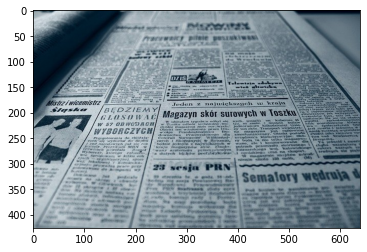

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/newspaper.jpg')

width, height = 640, 240 # 가로 크기 640, 세로 크기 240 으로 결과물 출력

# 네개의 점을 어레이로(그림판에서 각 귀퉁이 좌표 확인)
src = np.array([[511, 352], [1008, 345], [1122, 584], [455, 594]], dtype=np.float32) # input 4개 지점, shaape : (4, 2)
dst = np.array([[0, 0], [width, 0], [width, height], [0, height]], dtype=np.float32) # output 4개 지점, shape : (4, 2)
# 좌상, 우상, 우하, 좌하 (시계 방향으로 4지점)


matrix = cv2.getPerspectiveTransform(src, dst) # 변환에 적용될 변환행렬(Matrix) 얻어옴, shape : (3, 3)
result = cv2.warpPerspective(img, matrix, (width, height)) # 변환행렬(Matrix) 대로 변환, 적용할 이미지는 3차원 이미지


plt.imshow(img)
# plt.imshow(result)